# Fundamentos de la Computación Cuántica - Segunda Entrega

## Imports

In [99]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import PIL

Hola a todos/as,

 

para el miércoles 26/11 deben entregar la implementación en Quiskit con el correspondiente informe de:


a- ejercicio 10  del TP Operaciones (ParteI)

b- ejemplo 1 de ejercicio 1 de TP Paralelismo (Deutsch-Jozsa función constante igual a 1)

c- ejemplo 3 de ejercicio 1 de TP Paralelismo (Deutsch-Jozsa función balanceada)

d- ejemplo 4 de ejercicio 1 de TP Paralelismo (Deutsch-Jozsa función No balanceada)

 

Esta entrega, junto con la anterior, son parte de la evaluación integral de la cursada. 


Martín y Lucas

## A) Full-Adder con Operandos de 4 Qubits

Corresponde al ejercicio 10 del TP de operaciones (parte I).

#### Full-Adder

Planteo del circuito:

In [100]:
full_adder = QuantumCircuit(4, name="Full-Adder");

full_adder.ccx(0, 1, 3)
full_adder.cx(0, 1)
full_adder.ccx(1, 2, 3)
full_adder.cx(1, 2)
full_adder.cx(0, 1)

full_adder.draw()

q_0: ──■────■──────────────■──
       │  ┌─┴─┐          ┌─┴─┐
q_1: ──■──┤ X ├──■────■──┤ X ├
       │  └───┘  │  ┌─┴─┐└───┘
q_2: ──┼─────────■──┤ X ├─────
     ┌─┴─┐     ┌─┴─┐└───┘     
q_3: ┤ X ├─────┤ X ├──────────
     └───┘     └───┘

In [101]:
full_adder_measured = QuantumCircuit(4, 2, name="Full-Adder-Measured")

full_adder_measured.x(0)
full_adder_measured.x(2)

full_adder_measured.append(full_adder, [0, 1, 2, 3])

full_adder_measured.measure(2, 0)
full_adder_measured.measure(3, 1)

full_adder_measured.draw()

┌───┐┌─────────────┐      
q_0: ┤ X ├┤0            ├──────
     └───┘│             │      
q_1: ─────┤1            ├──────
     ┌───┐│  Full-Adder │┌─┐   
q_2: ┤ X ├┤2            ├┤M├───
     └───┘│             │└╥┘┌─┐
q_3: ─────┤3            ├─╫─┤M├
          └─────────────┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

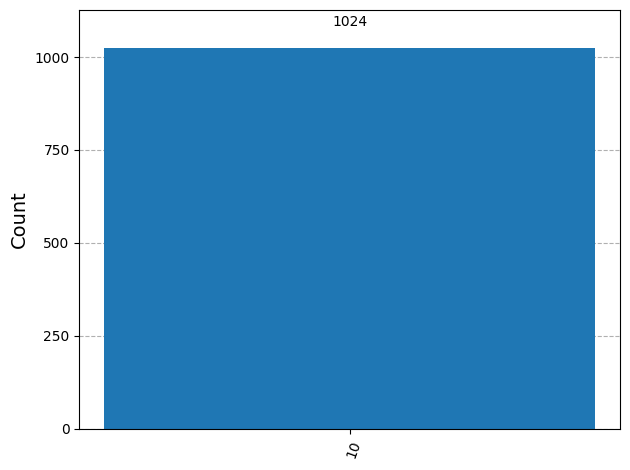

In [102]:
simulator = AerSimulator()

transpiled = transpile(full_adder_measured, simulator)
jobs = simulator.run(transpiled, shots=1024)
result = jobs.result()
counts = result.get_counts(transpiled)

plot_histogram(counts)

In [103]:
# --- 2. Creación del Circuito de Prueba (8 Combinaciones) ---
# c[0]: Entrada A (q0)
# c[1]: Entrada B (q1)
# c[2]: Entrada Cin (q2)
# c[3]: Salida S (q2)
# c[4]: Salia Cout (q3)
full_adder_measured = QuantumCircuit(4, 5) 

# Entradas en superposición.
full_adder_measured.h([0, 1, 2])

# Medición de las entradas (A, B y Cin) en bit 0, 1 y 2, respectivamente.
full_adder_measured.measure(0, 0)
full_adder_measured.measure(1, 1)
full_adder_measured.measure(2, 2)

# Aplicación de la compuerta Full-Adder.
full_adder_measured.append(full_adder, [0, 1, 2, 3])

# Medición de las salidas (S y Cout) en bits 3 y 4, respectivamente.
full_adder_measured.measure(2, 3)
full_adder_measured.measure(3, 4)

# Comprobación gráfica del circuito
full_adder_measured.draw()

┌───┐┌─┐      ┌─────────────┐      
q_0: ┤ H ├┤M├──────┤0            ├──────
     ├───┤└╥┘┌─┐   │             │      
q_1: ┤ H ├─╫─┤M├───┤1            ├──────
     ├───┤ ║ └╥┘┌─┐│  Full-Adder │┌─┐   
q_2: ┤ H ├─╫──╫─┤M├┤2            ├┤M├───
     └───┘ ║  ║ └╥┘│             │└╥┘┌─┐
q_3: ──────╫──╫──╫─┤3            ├─╫─┤M├
           ║  ║  ║ └─────────────┘ ║ └╥┘
c: 5/══════╩══╩══╩═════════════════╩══╩═
           0  1  2                 3  4

In [104]:
# --- 3. Ejecución y Resultados ---
simulator = AerSimulator()
transpiled = transpile(full_adder_measured, simulator)
job = simulator.run(transpiled, shots=1024)
results = job.result()
counts = results.get_counts(transpiled)

print("Resultados de las 8 combinaciones (Binario c4 c3 c2 c1 c0):")
print(counts)

Resultados de las 8 combinaciones (Binario c4 c3 c2 c1 c0):
{'10110': 134, '10011': 139, '10101': 123, '11111': 122, '00000': 123, '01010': 135, '01001': 121, '01100': 127}


Mapeo de columnas

In [105]:
# Definición de anchos de columna para consistencia.
W_BIT = 5  # Ancho para A, B, Cin, S y Cout.
W_COUNT = 15 # Ancho para Frecuencia.
W_CORRECT = 10 # Ancho de la correctitud del resultado.
TOTAL_WIDTH = W_BIT * 5 + W_COUNT + W_CORRECT + 22 # 8 barras y 14 espacios adicionales.

# Separador
def print_separator(width):
    print(f"|{'-' * (width - 2)}|") # -2 por las barras.

# Título
print_separator(TOTAL_WIDTH)
print(f"|{'Tabla de Verdad Experimental del Full-Adder':^{TOTAL_WIDTH - 2}}|") # -2 por las barras.
print_separator(TOTAL_WIDTH)
# Encabezados
print(f"| {'A':^{W_BIT}} | {'B':^{W_BIT}} | {'Cin':^{W_BIT}} | {'S':^{W_BIT}} | {'Cout':^{W_BIT}} | {'Frecuencia':^{W_COUNT}} | {'¿Correcto?':^{W_CORRECT}} |")
print_separator(TOTAL_WIDTH)

for bitstring, count in counts.items():

    # Correspondencia de la salida.
    # El bit menos significativo aparece
    # último en el bitstring.
    a = int(bitstring[4])
    b = int(bitstring[3])
    cin = int(bitstring[2])
    s = int(bitstring[1])
    cout = int(bitstring[0])
    
    # En Python,
    # & -> And (. o ^).
    # | -> Or (v).
    # ^ -> Xor.
    
    # Los resultados correcto son S = A^B^Cin y Cout = (A^B)Cin v (A.B).
    # Se calcula el resultado esperado para un FA funcional.
    expected_sum = a ^ b ^ cin
    expected_cout = (a & b) | (cin & (a ^ b))

    # Comprobación de la lógica del FA:
    is_correct = "NO"
    if s == expected_sum and cout == expected_cout:
        is_correct = "SÍ"

    print(f"| {a:^{W_BIT}} | {b:^{W_BIT}} | {cin:^{W_BIT}} | {s:^{W_BIT}} | {cout:^{W_BIT}} | {count:^{W_COUNT}} | {is_correct:^{W_CORRECT}} |")

print_separator(TOTAL_WIDTH)

|----------------------------------------------------------------------|
|             Tabla de Verdad Experimental del Full-Adder              |
|----------------------------------------------------------------------|
|   A   |   B   |  Cin  |   S   | Cout  |   Frecuencia    | ¿Correcto? |
|----------------------------------------------------------------------|
|   0   |   1   |   1   |   0   |   1   |       134       |     SÍ     |
|   1   |   1   |   0   |   0   |   1   |       139       |     SÍ     |
|   1   |   0   |   1   |   0   |   1   |       123       |     SÍ     |
|   1   |   1   |   1   |   1   |   1   |       122       |     SÍ     |
|   0   |   0   |   0   |   0   |   0   |       123       |     SÍ     |
|   0   |   1   |   0   |   1   |   0   |       135       |     SÍ     |
|   1   |   0   |   0   |   1   |   0   |       121       |     SÍ     |
|   0   |   0   |   1   |   1   |   0   |       127       |     SÍ     |
|--------------------------------------------------

Habiendo comprobado que el Full-Adder funciona correctamente, se plantea el Full-Adder de cuatro operandos.

La forma que planteo a continuación difiere de la forma planteada

A0 A1 A2 A3   (4 qubits)
B0 B1 B2 B3   (4 qubits)
Cin inicial    (1 qubit)
Sum qubits     (4 qubits)
Cout final     (1 qubit)


En el informe anterior, la forma que había planteado para resolver este problema era el uso de varios swaps. Esto fue con el objetivo de reducir el número de qubits utilizados (lo cual se consiguió, logrando resolver el problema con 13 qubits). Sin embargo, entiendo ahora mejor que el número de qubits utilizados no es un inconveniente y que lo que debería priorizarse el tiempo de ejecución.

Como consecuencia, el planteo de este circuito difiere del planteado en el informe anterior.

In [106]:
# Sumador de 4 bits usando 4 full adders.
# 13 qubits de entrada.
full_adder_4 = QuantumCircuit(13, name="Full-Adder-4")

# Índices de los qubits
A = [0, 1, 2, 3]
B = [4, 5, 6, 7]
S = [8, 9, 10, 11] # Salidas.
cin = S[0]
cout = [9, 10, 11, 12]
final_cout = cout[3] # Último cout.

# Full adder 0 (LSQ - Least Significant Qubit)
full_adder_4.append(full_adder, [A[0], B[0], S[0], cout[0]])

# Full adder 1
full_adder_4.append(full_adder, [A[1], B[1], S[1], cout[1]])

# Full adder 2
full_adder_4.append(full_adder, [A[2], B[2], S[2], cout[2]])

# Full adder 3 (MSB)
full_adder_4.append(full_adder, [A[3], B[3], S[3], cout[3]])

full_adder_4.draw()


┌─────────────┐                                             
 q_0: ┤0            ├─────────────────────────────────────────────
      │             │┌─────────────┐                              
 q_1: ┤             ├┤0            ├──────────────────────────────
      │             ││             │┌─────────────┐               
 q_2: ┤             ├┤             ├┤0            ├───────────────
      │             ││             ││             │┌─────────────┐
 q_3: ┤             ├┤             ├┤             ├┤0            ├
      │             ││             ││             ││             │
 q_4: ┤1            ├┤             ├┤             ├┤             ├
      │  Full-Adder ││             ││             ││             │
 q_5: ┤             ├┤1            ├┤             ├┤             ├
      │             ││  Full-Adder ││             ││             │
 q_6: ┤             ├┤             ├┤1            ├┤             ├
      │             ││             ││  Full-Adder ││             │
 q_7: ┤             ├┤             ├┤             ├┤1            ├
      │             ││             ││             ││  Full-Adder │
 q_8: ┤2            ├┤             ├┤             ├┤             ├
      │             ││             ││             ││             │
 q_9: ┤3            ├┤2            ├┤             ├┤             ├
      └─────────────┘│             ││             ││             │
q_10: ───────────────┤3            ├┤2            ├┤             ├
                     └─────────────┘│             ││             │
q_11: ──────────────────────────────┤3            ├┤2            ├
                                    └─────────────┘│             │
q_12: ─────────────────────────────────────────────┤3            ├
                                                   └─────────────┘

Simulación

In [107]:
full_adder_4_measured = QuantumCircuit(13, 14)

# Entradas en superposición.
full_adder_4_measured.h([0, 1, 2, 3, 4, 5, 6, 7, 8])

next_measurement_qubit = 0

# Medición de las entradas (A, B y Cin) en bit 0, 1 y 2, respectivamente.
for qubit_number in range(9):
    full_adder_4_measured.measure(qubit_number, next_measurement_qubit)
    next_measurement_qubit += 1

# Aplicación de la compuerta Full-Adder.
full_adder_4_measured.append(full_adder_4, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

for qubit_number in S:
    full_adder_4_measured.measure(qubit_number, next_measurement_qubit)
    next_measurement_qubit += 1

full_adder_4_measured.measure(final_cout, next_measurement_qubit)

# Comprobación gráfica del circuito
full_adder_4_measured.draw()

┌───┐┌─┐                        ┌────────────────┐               
 q_0: ┤ H ├┤M├────────────────────────┤0               ├───────────────
      ├───┤└╥┘┌─┐                     │                │               
 q_1: ┤ H ├─╫─┤M├─────────────────────┤1               ├───────────────
      ├───┤ ║ └╥┘┌─┐                  │                │               
 q_2: ┤ H ├─╫──╫─┤M├──────────────────┤2               ├───────────────
      ├───┤ ║  ║ └╥┘┌─┐               │                │               
 q_3: ┤ H ├─╫──╫──╫─┤M├───────────────┤3               ├───────────────
      ├───┤ ║  ║  ║ └╥┘┌─┐            │                │               
 q_4: ┤ H ├─╫──╫──╫──╫─┤M├────────────┤4               ├───────────────
      ├───┤ ║  ║  ║  ║ └╥┘┌─┐         │                │               
 q_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├─────────┤5               ├───────────────
      ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐      │                │               
 q_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├──────┤6  Full-Adder-4 ├───────────────
      ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐   │                │               
 q_7: ┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├───┤7               ├───────────────
      ├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐│                │┌─┐            
 q_8: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├┤8               ├┤M├────────────
      └───┘ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘│                │└╥┘┌─┐         
 q_9: ──────╫──╫──╫──╫──╫──╫──╫──╫──╫─┤9               ├─╫─┤M├─────────
            ║  ║  ║  ║  ║  ║  ║  ║  ║ │                │ ║ └╥┘┌─┐      
q_10: ──────╫──╫──╫──╫──╫──╫──╫──╫──╫─┤10              ├─╫──╫─┤M├──────
            ║  ║  ║  ║  ║  ║  ║  ║  ║ │                │ ║  ║ └╥┘┌─┐   
q_11: ──────╫──╫──╫──╫──╫──╫──╫──╫──╫─┤11              ├─╫──╫──╫─┤M├───
            ║  ║  ║  ║  ║  ║  ║  ║  ║ │                │ ║  ║  ║ └╥┘┌─┐
q_12: ──────╫──╫──╫──╫──╫──╫──╫──╫──╫─┤12              ├─╫──╫──╫──╫─┤M├
            ║  ║  ║  ║  ║  ║  ║  ║  ║ └────────────────┘ ║  ║  ║  ║ └╥┘
c: 14/══════╩══╩══╩══╩══╩══╩══╩══╩══╩════════════════════╩══╩══╩══╩══╩═
            0  1  2  3  4  5  6  7  8                    9  10 11 12 13

In [108]:
# --- 3. Ejecución y Resultados ---
simulator = AerSimulator()
transpiled = transpile(full_adder_4_measured, simulator)
job = simulator.run(transpiled, shots=10240)
results = job.result()
counts = results.get_counts(transpiled)

print(counts)

{'01010100001001': 14, '00111000000111': 19, '00100100000011': 16, '11010111011100': 19, '01011000101001': 12, '01001101100010': 23, '01100001010111': 13, '00111000010110': 22, '01111001011010': 17, '10100101011110': 18, '01110000001110': 23, '10100011100110': 15, '00100000100010': 24, '01101010110010': 15, '10010101101011': 19, '11010110111110': 18, '11000110101101': 20, '10010000111111': 27, '01010101010100': 15, '10110111011000': 20, '01011001010110': 22, '01100010110001': 24, '01111011110000': 14, '10001011110010': 24, '00101000100011': 18, '01000000100110': 17, '10100110011010': 20, '10101101111101': 19, '10101101101110': 11, '01010101000101': 26, '00110000000110': 21, '10111010101101': 20, '01000010000000': 20, '01001101000100': 19, '00101001010000': 18, '01101101010111': 14, '01100010010011': 21, '01010110000001': 19, '10000000101110': 26, '00110001000010': 23, '10100110101001': 13, '10011010011010': 27, '01011101100100': 19, '01110100001101': 22, '01010000101000': 18, '01101100

Para ello, se plantea una función genérica que sirva para mostrar los resultados de un sumador de operandos de N qubits:

In [109]:
# Número de bits de los operandos.
N_BITS = 4

"""
Si se quiere probar una configuraciń específica, puede hacerse colocaándolas
de la siguiente forma:

counts = {
    '00000000000000': 0,
    '00001100000000': 1024, 
    ...,
}
"""

# Anchos de columnas.
W_BITS = max(11, N_BITS * 3 - 1)  # Para A, B y S.
W_COUNT = 12
W_CHECK = 16

# Ancho total: 5 columnas de bits + count + check + separadores.
TOTAL_WIDTH = 5 * W_BITS + W_COUNT + W_CHECK + 14 + 8

def parse(substring, n):
    """
    Extracción de los qubits del bitstring, siguiendo, de acuerdo a cómo se plantearon
    las mediciones, el siguiente formato: [Cout][SN..S0][Cin][BN..B0][AN..A0]
    
    Debido a que los bits en el string están como [Xn-1...X0], hay que invertirlos para obtener [X0...Xn-1].
    """
    i = 0
    parsed_cout = int(substring[i]); i += 1
    parsed_s = [int(substring[i+n-1-j]) for j in range(n)]; i += n  # Invertido: se guarda S0 primero.
    parsed_cin = int(substring[i]); i += 1
    parsed_b = [int(substring[i+n-1-j]) for j in range(n)]; i += n  # Invertido: se guarda B0 primero.
    parsed_a = [int(substring[i+n-1-j]) for j in range(n)]          # Invertido: se guarda A0 primero.
    return parsed_a, parsed_b, parsed_cin, parsed_s, parsed_cout

# Calcular suma esperada
def expected(A, B, cin, n):
    """
    Usando operadores de corrimiento de bits, se calcula la suma esperada.
    """
    a = sum(A[i] << i for i in range(n))
    b = sum(B[i] << i for i in range(n))
    total = a + b + cin
    expected_s = [(total >> i) & 1 for i in range(n)]
    expected_cout = (total >> n) & 1
    return expected_s, expected_cout

# Título de la tabla.
print_separator(TOTAL_WIDTH)
print(f"|{'Tabla de Verdad - Sumador de ' + str(N_BITS) + ' bits':^{TOTAL_WIDTH - 2}}|")
print_separator(TOTAL_WIDTH)

# Encabezados.
headers = [f"A{N_BITS-1}...A0", f"B{N_BITS-1}...B0", "Cin", f"S{N_BITS-1}...S0", "Cout"]
print(f"| {headers[0]:^{W_BITS}} | {headers[1]:^{W_BITS}} | {headers[2]:^{W_BITS}} | {headers[3]:^{W_BITS}} | {headers[4]:^{W_BITS}} | {'Frecuencia':^{W_COUNT}} | {'¿Correcto?':^{W_CHECK}} |")
print_separator(TOTAL_WIDTH)

# Generación de cada fila.
for bitstring, count in sorted(counts.items()):
    parsed_a, parsed_b, parsed_cin, parsed_s, parsed_cout = parse(bitstring, N_BITS)
    expected_s, expected_cout = expected(parsed_a, parsed_b, parsed_cin, N_BITS)
    
    ok = "SÍ" if parsed_s == expected_s and parsed_cout == expected_cout else "NO"
    
    # Se muestran los bits de mayor a menor índice.
    a_str = ' '.join(str(parsed_a[i]) for i in range(N_BITS-1, -1, -1))
    b_str = ' '.join(str(parsed_b[i]) for i in range(N_BITS-1, -1, -1))
    s_str = ' '.join(str(parsed_s[i]) for i in range(N_BITS-1, -1, -1))
    
    print(f"| {a_str:^{W_BITS}} | {b_str:^{W_BITS}} | {parsed_cin:^{W_BITS}} | {s_str:^{W_BITS}} | {parsed_cout:^{W_BITS}} | {count:^{W_COUNT}} | {ok:^{W_CHECK}} |")

print_separator(TOTAL_WIDTH)

# Impresión de las estadísticas.
total = sum(counts.values())
correct = sum(count for s, count in counts.items() 
            if parse(s, N_BITS)[3:] == expected(*parse(s, N_BITS)[:3], N_BITS))

print(f"\nTotal mediciones: {total}")
print(f"Configuraciones únicas: {len(counts)}")
print(f"Precisión: {100 * correct / total:.2f}%" if total > 0 else "N/A")

|-------------------------------------------------------------------------------------------------------|
|                                  Tabla de Verdad - Sumador de 4 bits                                  |
|-------------------------------------------------------------------------------------------------------|
|   A3...A0   |   B3...B0   |     Cin     |   S3...S0   |    Cout     |  Frecuencia  |    ¿Correcto?    |
|-------------------------------------------------------------------------------------------------------|
|   0 0 0 0   |   0 0 0 0   |      0      |   0 0 0 0   |      0      |      12      |        SÍ        |
|   0 0 0 1   |   0 0 0 0   |      0      |   0 0 0 1   |      0      |      16      |        SÍ        |
|   0 0 0 0   |   0 0 0 1   |      0      |   0 0 0 1   |      0      |      20      |        SÍ        |
|   0 0 0 0   |   0 0 0 0   |      1      |   0 0 0 1   |      0      |      17      |        SÍ        |
|   0 0 1 0   |   0 0 0 0   |      0      |   

## B) Deutsch-Jozsa - Función Constante Igual a 1

Corresponde al ejemplo 1 del ejercicio 1 del TP de paralelismo.

Como primer paso, se construye el circuito de Deutsch-Jozsa para funciones de N entradas y un resultado. Esta se plantea de forma que sea reutilizable, ya que los demás incisos también la requiren.

In [110]:
def deutsch_jozsa(n_qubits, oracle_function=None):
    """
    Crea un circuito Deutsch-Jozsa de n qubits.
    
    Args:
        n_qubits: Número de qubits de entrada (+ 1 qubit auxiliar).
        oracle_function: Función que recibe el circuito y aplica el oráculo
    """
    
    deutsch_jozsa = QuantumCircuit(n_qubits + 1, name="Deutsch-Jozsa")
    
    # Aplicación de Hadamards a las entradas y al qubit auxiliar.
    deutsch_jozsa.h(range(n_qubits + 1))
    deutsch_jozsa.barrier(label="Inicio del Oráculo")
    
    # De existir, se aplica el oráculo.
    if oracle_function:
        oracle_function(deutsch_jozsa, n_qubits)
    
    deutsch_jozsa.barrier(label="Fin del Oráculo")
    
    # Aplicación de Hadamards a los qubits de entradas.
    deutsch_jozsa.h(range(n_qubits))
    
    return deutsch_jozsa

circuit = deutsch_jozsa(3)
circuit.draw()

┌───┐ Inicio del Oráculo  Fin del Oráculo ┌───┐
q_0: ┤ H ├─────────░──────────────────░────────┤ H ├
     ├───┤         ░                  ░        ├───┤
q_1: ┤ H ├─────────░──────────────────░────────┤ H ├
     ├───┤         ░                  ░        ├───┤
q_2: ┤ H ├─────────░──────────────────░────────┤ H ├
     ├───┤         ░                  ░        └───┘
q_3: ┤ H ├─────────░──────────────────░─────────────
     └───┘         ░                  ░

A continuación se construye la función (oráculo en el contexto del algoritmo) del enunciado, la cual es `f(x_2, x_1, x_0) = 1`.

In [111]:
def oraculo(quantum_circuit, number_of_qubits):
    
    # Número de qubits que pueden acceder a través
    # los índices. Variable definida para no restar
    # constantemente uno.
    accesible_qubits = number_of_qubits - 1
    
    quantum_circuit.cx(0, accesible_qubits)
    quantum_circuit.x(0)
    quantum_circuit.ccx(0, 1, accesible_qubits)
    quantum_circuit.x(1)
    # Todos los qubits excepto el último como controles
    quantum_circuit.mcx(list(range(accesible_qubits)), accesible_qubits)
    quantum_circuit.x(2)
    quantum_circuit.mcx(list(range(accesible_qubits)), accesible_qubits)
    
    return quantum_circuit
    

qc = QuantumCircuit(4)
oraculo(qc, 4).draw()

┌───┐                         
q_0: ──■──┤ X ├──■─────────■─────────■──
       │  └───┘  │  ┌───┐  │         │  
q_1: ──┼─────────■──┤ X ├──■─────────■──
       │         │  └───┘  │  ┌───┐  │  
q_2: ──┼─────────┼─────────■──┤ X ├──■──
     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐└───┘┌─┴─┐
q_3: ┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├
     └───┘     └───┘     └───┘     └───┘

El cual puede generalizarse a la siguiente forma:

In [128]:
def oraculo(quantum_circuit, number_of_qubits):
    
    if (number_of_qubits < 2):
        return
    
    # Número de qubits que pueden acceder a través
    # los índices. Variable definida para no restar
    # constantemente uno.
    accesible_qubits = number_of_qubits - 1
    
    for qubit in range(accesible_qubits):
        quantum_circuit.mcx(list(range(qubit + 1)), accesible_qubits)
        quantum_circuit.x(qubit)
        
    quantum_circuit.mcx(list(range(accesible_qubits)), accesible_qubits)
    
    return quantum_circuit

number_of_qubits = 4
qc = QuantumCircuit(number_of_qubits)

oraculo(qc, number_of_qubits).draw()

┌───┐                         
q_0: ──■──┤ X ├──■─────────■─────────■──
       │  └───┘  │  ┌───┐  │         │  
q_1: ──┼─────────■──┤ X ├──■─────────■──
       │         │  └───┘  │  ┌───┐  │  
q_2: ──┼─────────┼─────────■──┤ X ├──■──
     ┌─┴─┐     ┌─┴─┐     ┌─┴─┐└───┘┌─┴─┐
q_3: ┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├
     └───┘     └───┘     └───┘     └───┘

Aplicando el algoritmo de Deutsch-Jozsa, se obtiene el siguiente resultado:

In [129]:
number_of_qubits = 4

result = deutsch_jozsa(number_of_qubits, oraculo)
result.draw()

┌───┐ Inicio del Oráculo      ┌───┐                         »
q_0: ┤ H ├─────────░────────────■──┤ X ├──■─────────■─────────■──»
     ├───┤         ░            │  └───┘  │  ┌───┐  │         │  »
q_1: ┤ H ├─────────░────────────┼─────────■──┤ X ├──■─────────■──»
     ├───┤         ░            │         │  └───┘  │  ┌───┐  │  »
q_2: ┤ H ├─────────░────────────┼─────────┼─────────■──┤ X ├──■──»
     ├───┤         ░          ┌─┴─┐     ┌─┴─┐     ┌─┴─┐└───┘┌─┴─┐»
q_3: ┤ H ├─────────░──────────┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├»
     ├───┤         ░          └───┘     └───┘     └───┘     └───┘»
q_4: ┤ H ├─────────░─────────────────────────────────────────────»
     └───┘         ░                                             »
«      Fin del Oráculo ┌───┐
«q_0: ────────░────────┤ H ├
«             ░        ├───┤
«q_1: ────────░────────┤ H ├
«             ░        ├───┤
«q_2: ────────░────────┤ H ├
«             ░        ├───┤
«q_3: ────────░────────┤ H ├
«             ░        └───┘
«q_4: ────────░─────────────
«             ░

Se añaden las mediciones:

In [130]:
measured_quantum_circuit = QuantumCircuit(number_of_qubits, number_of_qubits - 1)
measured_quantum_circuit.append(result, list(range(number_of_qubits - 1)))

for i in range(number_of_qubits - 1): # -1 ya que no se quiere medir el auxiliar.
    measured_quantum_circuit.measure(i, i)

CircuitError: 'The amount of qubit arguments 3 does not match the instruction expectation (5).'

Para que f sea constante, debe medir todos ceros. Se realiza la simulación:

In [117]:
# --- 3. Ejecución y Resultados ---
simulator = AerSimulator()
transpiled = transpile(result, simulator)
job = simulator.run(transpiled, shots=1024)
results = job.result()
counts = results.get_counts(transpiled)

print(counts)

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2286dba410>"'

## Deutsch-Jozsa - Función Balanceada

Corresponde al ejemplo 4 del ejercicio 1 del TP de paralelismo.

## Deutsch-Jozsa - Función No Balanceada

Corresponde al ejemplo 4 del ejercicio 1 del TP de paralelismo.